In [9]:
import sys
sys.path.append("../src")
import smoothness as smooth
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib
import contextlib

In [10]:
T = 150
N = 12
speed_limits = [40.0, 40.0]
controls = [[], []]
cycle = [60.0, 60.0]

increment =  np.linspace(-1, 1, 21)

In [11]:
with contextlib.redirect_stdout(None):
    objectives_1_two, gradients_1_two = smooth.single_junction_smooth(T, N, speed_limits, controls, cycle, increment, 0, 0)

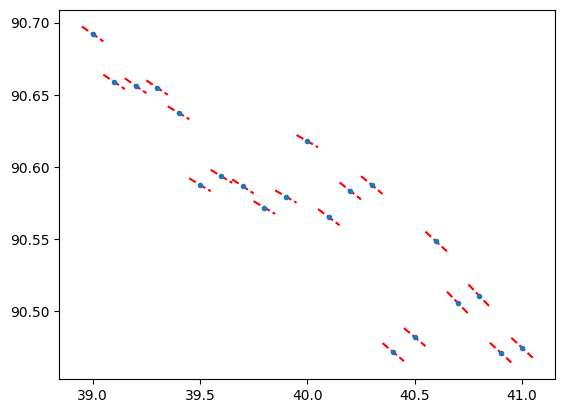

In [12]:
delta_inc = increment[1] - increment[0]

# Speed 1:
for inc, speed_obj, grad in zip(increment, objectives_1_two, gradients_1_two):
    plt.plot([40 + inc - delta_inc/2, 40 + inc + delta_inc/2], [speed_obj.detach() - grad * delta_inc / 2, speed_obj.detach() + grad * delta_inc / 2], '--r')
plt.plot(40+increment, [o.detach() for o in objectives_1_two], '.')

tikzplotlib.save("../figurer/single_junction_bus_delay_01speed_same_time_N=12.tex")